## Imports

In [1]:
import copy
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import torch
import torch.onnx
import torch.nn as nn
import torch.utils.data as data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)
torch.backends.cudnn.determinstic = True
torch.backends.cudnn.benchmark = False

In [22]:
## Data mining


In [23]:
df_org = pd.read_csv('train_data.csv')
# df[['Year', 'Month', 'Day']] = df['dteday'].str.split('-', expand=True)
df_eval_org = pd.read_csv('test_data.csv')

In [24]:
df = df_org.copy()
df_eval = df_eval_org.copy()

In [25]:
df

,SalePrice,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,SubwayStation,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,814,3,terraced,individual_heating,management_in_trust,111.0,184.0,5min~10min,10min~15min,3.0,0.0,Kyungbuk_uni_hospital,5,6.0,9.0
1,51327,1985,587,8,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0
2,48672,1985,587,6,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0
3,380530,2006,2056,8,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,5.0,11.0,Sin-nam,5,3.0,7.0
4,78318,1992,644,2,mixed,individual_heating,self_management,142.0,79.0,5min~10min,15min~20min,4.0,8.0,Myung-duk,3,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119,570796,2007,1928,24,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,14.0,16.0,Kyungbuk_uni_hospital,10,9.0,10.0
4120,307079,2015,644,22,terraced,individual_heating,management_in_trust,102.0,400.0,0~5min,5min~10min,5.0,10.0,Daegu,7,7.0,11.0
4121,357522,2007,868,20,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,14.0,16.0,Kyungbuk_uni_hospital,10,9.0,10.0
4122,312389,1978,1327,1,corridor,individual_heating,self_management,87.0,0.0,0~5min,0-5min,1.0,4.0,Kyungbuk_uni_hospital,3,7.0,11.0


In [26]:
df_eval

,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,SubwayStation,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,1993,914,10,mixed,individual_heating,management_in_trust,523.0,536.0,0~5min,15min~20min,8.0,20.0,Myung-duk,4,14.0,17.0
1,2014,907,16,terraced,individual_heating,management_in_trust,90.0,1174.0,0~5min,0-5min,7.0,20.0,Myung-duk,9,14.0,17.0
2,2007,1629,7,terraced,individual_heating,management_in_trust,7.0,605.0,0~5min,0-5min,5.0,5.0,Banwoldang,5,9.0,5.0
3,2005,743,21,mixed,individual_heating,management_in_trust,67.0,798.0,0~5min,5min~10min,6.0,0.0,Bangoge,7,13.0,15.0
4,2006,903,7,terraced,individual_heating,management_in_trust,123.0,181.0,5min~10min,0-5min,3.0,11.0,Myung-duk,4,8.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,2006,2056,2,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,5.0,11.0,Sin-nam,5,3.0,7.0
1763,2007,1394,7,terraced,individual_heating,management_in_trust,554.0,524.0,0~5min,0-5min,5.0,10.0,Banwoldang,4,9.0,8.0
1764,1993,644,20,mixed,individual_heating,management_in_trust,523.0,536.0,0~5min,15min~20min,8.0,20.0,Myung-duk,4,14.0,17.0
1765,2008,914,11,terraced,individual_heating,management_in_trust,197.0,475.0,5min~10min,0-5min,6.0,14.0,Sin-nam,8,7.0,9.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4124 entries, 0 to 4123
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SalePrice                  4124 non-null   int64  
 1   YearBuilt                  4124 non-null   int64  
 2   Size(sqf)                  4124 non-null   int64  
 3   Floor                      4124 non-null   int64  
 4   HallwayType                4124 non-null   object 
 5   HeatingType                4124 non-null   object 
 6   AptManageType              4124 non-null   object 
 7   N_Parkinglot(Ground)       4124 non-null   float64
 8   N_Parkinglot(Basement)     4124 non-null   float64
 9   TimeToBusStop              4124 non-null   object 
 10  TimeToSubway               4124 non-null   object 
 11  N_manager                  4124 non-null   float64
 12  N_elevators                4124 non-null   float64
 13  SubwayStation              4124 non-null   objec

In [28]:
class0 = df.loc[(df['SalePrice'] <= 100000)]
class1 = df.loc[(df['SalePrice'] >= 100000) & (df['SalePrice'] <= 350000)]
class2 = df.loc[(df['SalePrice'] >= 350000)]

In [29]:
df_oversampled = [class0, class0, class0, class0, class0, class1, class2, class2, class2, class2, class2]
df_oversampled = pd.concat(df_oversampled)
df_oversampled = df_oversampled.sample(frac=1, random_state=42)
df_oversampled

,SalePrice,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,SubwayStation,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
853,73840,2005,572,10,mixed,individual_heating,management_in_trust,67.0,798.0,0~5min,5min~10min,6.0,0.0,Bangoge,7,13.0,15.0
515,348672,2007,1387,43,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,14.0,16.0,Kyungbuk_uni_hospital,10,9.0,10.0
3828,380530,2015,914,15,terraced,individual_heating,management_in_trust,175.0,1321.0,5min~10min,5min~10min,8.0,24.0,no_subway_nearby,10,6.0,5.0
3937,360176,2014,914,5,terraced,individual_heating,management_in_trust,467.0,203.0,0~5min,0-5min,5.0,12.0,Banwoldang,10,0.0,0.0
2753,353716,2007,1643,12,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,14.0,16.0,Kyungbuk_uni_hospital,10,9.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4015,280530,2005,914,19,mixed,individual_heating,management_in_trust,67.0,798.0,0~5min,5min~10min,6.0,0.0,Bangoge,7,13.0,15.0
3236,150778,2013,644,15,terraced,individual_heating,management_in_trust,8.0,930.0,0~5min,0-5min,6.0,14.0,Kyungbuk_uni_hospital,7,9.0,11.0
3480,309734,2014,843,25,terraced,individual_heating,management_in_trust,90.0,1174.0,0~5min,0-5min,7.0,20.0,Myung-duk,9,14.0,17.0
969,84955,1993,644,16,mixed,individual_heating,management_in_trust,523.0,536.0,0~5min,15min~20min,8.0,20.0,Myung-duk,4,14.0,17.0


In [30]:
df = df_oversampled

In [31]:
new_col = df['SalePrice'].apply(lambda x: 2 if (x > 300_000) else
                                        1 if (x > 100_000) else
                                        0)
df.insert(1, 'PriceCategory', new_col)
df

,SalePrice,PriceCategory,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,SubwayStation,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
853,73840,0,2005,572,10,mixed,individual_heating,management_in_trust,67.0,798.0,0~5min,5min~10min,6.0,0.0,Bangoge,7,13.0,15.0
515,348672,2,2007,1387,43,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,14.0,16.0,Kyungbuk_uni_hospital,10,9.0,10.0
3828,380530,2,2015,914,15,terraced,individual_heating,management_in_trust,175.0,1321.0,5min~10min,5min~10min,8.0,24.0,no_subway_nearby,10,6.0,5.0
3937,360176,2,2014,914,5,terraced,individual_heating,management_in_trust,467.0,203.0,0~5min,0-5min,5.0,12.0,Banwoldang,10,0.0,0.0
2753,353716,2,2007,1643,12,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,14.0,16.0,Kyungbuk_uni_hospital,10,9.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4015,280530,1,2005,914,19,mixed,individual_heating,management_in_trust,67.0,798.0,0~5min,5min~10min,6.0,0.0,Bangoge,7,13.0,15.0
3236,150778,1,2013,644,15,terraced,individual_heating,management_in_trust,8.0,930.0,0~5min,0-5min,6.0,14.0,Kyungbuk_uni_hospital,7,9.0,11.0
3480,309734,2,2014,843,25,terraced,individual_heating,management_in_trust,90.0,1174.0,0~5min,0-5min,7.0,20.0,Myung-duk,9,14.0,17.0
969,84955,0,1993,644,16,mixed,individual_heating,management_in_trust,523.0,536.0,0~5min,15min~20min,8.0,20.0,Myung-duk,4,14.0,17.0


In [32]:
numerical_columns = ["YearBuilt", "Size(sqf)", "Floor", "N_Parkinglot(Ground)", "N_Parkinglot(Basement)", "N_manager", "N_elevators", "N_FacilitiesInApt", "N_FacilitiesNearBy(Total)", "N_SchoolNearBy(Total)"]

In [33]:
categorical_columns = ["HallwayType", "HeatingType", "AptManageType", "TimeToBusStop", "TimeToSubway", "SubwayStation"]

In [34]:
one_hot = pd.get_dummies(df[categorical_columns])
one_hot_eval = pd.get_dummies(df_eval[categorical_columns])

In [35]:
df.drop(columns=categorical_columns, inplace=True)
df_eval.drop(columns=categorical_columns, inplace=True)


In [36]:
df_train = df.sample(frac=0.8,random_state=200) #random state is a seed value
df_test = df.drop(df_train.index)

cat_train = one_hot.sample(frac=0.8,random_state=200) #random state is a seed value
cat_test = one_hot.drop(cat_train.index)

numerical_data = torch.from_numpy(df_train.values[:, 2:]).float()
categorical_data = torch.from_numpy(cat_train.values).float()
targets = torch.from_numpy(df_train.values[:, 1]).float()

test_numerical_data = torch.from_numpy(df_test.values[:, 2:]).float()
test_categorical_data = torch.from_numpy(cat_test.values).float()
test_targets = torch.from_numpy(df_test.values[:, 1]).float()

eval_numerical_data = torch.from_numpy(df_eval.values).float()
eval_categorical_data = torch.from_numpy(one_hot_eval.values).float()

In [37]:
numerical_data.shape

torch.Size([6926, 10])

In [40]:
train_dataset = data.TensorDataset(numerical_data,categorical_data,targets)
test_dataset = data.TensorDataset(test_numerical_data,test_categorical_data,test_targets)
eval_dataset = data.TensorDataset(eval_numerical_data, eval_categorical_data)

In [41]:
train_data_loader = data.DataLoader(train_dataset, batch_size=256, shuffle=True)
test_data_loader = data.DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=True, drop_last=False)
data_loaders = {'train': train_data_loader, 'test':test_data_loader}
eval_data_loader = data.DataLoader(eval_dataset, batch_size=len(eval_dataset), shuffle=False, drop_last=False)

In [42]:
list(train_dataset[0])

[tensor([1997.,  558.,   13.,   82.,   56.,    2.,    4.,    5.,   13.,    7.]),
 tensor([0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0.]),
 tensor(0.)]

In [43]:
class ApartmentClassifier(nn.Module):

    def __init__(self, num_hidden1, num_hidden2, num_outputs):
        super().__init__()
        self.layer1 = nn.Linear(numerical_data.shape[1] + categorical_data.shape[1], num_hidden1)
        # self.bn1 = nn.BatchNorm1d(num_hidden1)
        self.act_f1 = nn.ReLU()
        self.d1 = nn.Dropout(0.01)

        self.layer2 = nn.Linear(num_hidden1, num_hidden2)
        # self.bn2 = nn.BatchNorm1d(num_hidden2)
        self.act_f2 = nn.ReLU()
        self.d2 = nn.Dropout(0.01)

        self.layer3= nn.Linear(num_hidden2, num_outputs)


    def forward(self, x, cat_x):
        x = torch.cat([x,cat_x],dim=1)
        x = self.layer1(x)
        # x = self.bn1(x)
        x = self.act_f1(x)
        x = self.d1(x)

        x = self.layer2(x)
        # x = self.bn2(x)
        x = self.act_f2(x)
        x = self.d2(x)

        x = self.layer3(x)

        return x

In [44]:
def get_correct(predictions, targets):
    correct = 0
    pred = torch.argmax(predictions, dim=1)
    correct += pred.eq(targets.view_as(pred).to(device)).sum().item()
    return correct

In [45]:


def l1_regularization(model, l1_lambda):
    sum_layer1_params = sum(abs(p).sum() for p in model.layer1.parameters())
    sum_layer2_params = sum(abs(p).sum() for p in model.layer2.parameters())
    l1_reg = l1_lambda * (sum_layer1_params + sum_layer2_params )
    return l1_reg


In [46]:

def train_model(model, data_loaders, loss_module, optimizer, scheduler, l1_lambda, num_epochs=100):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    history = {}
    training_loss, training_acc, test_loss, test_acc = [], [], [], []
    for epoch in range(num_epochs):
        for phase in ['train', 'test']:
            if phase =='train':
                model.train()
            else:
                model.eval()
            running_loss = 0.0
            running_corrects = 0

            for num_inputs, cat_inputs, targets in data_loaders[phase]:
                num_inputs = num_inputs.to(device)
                cat_inputs = cat_inputs.to(device)
                targets = targets.to(device)
                optimizer.zero_grad()
                with torch.set_grad_enabled(phase == 'train'):
                    predictions = model(num_inputs, cat_inputs)
                    predictions = predictions.squeeze(dim=1)
                    loss = loss_module(predictions, targets.long())
                    # loss = loss + l1_regularization(model, l1_lambda)
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                running_loss += loss.item() * num_inputs.size(0)
                running_corrects += get_correct(predictions, targets)
            # if phase == 'train':
            #      scheduler.step()

            epoch_loss = running_loss / len(data_loaders[phase].dataset)
            epoch_acc = running_corrects / len(data_loaders[phase].dataset)
            if phase == 'train':
                training_loss.append(epoch_loss)
                training_acc.append(epoch_acc)
            else:
                test_loss.append(epoch_loss)
                test_acc.append(epoch_acc)

            print(f"Epoch {epoch}:",f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'test' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

    time_elapsed = time.time() - since
    print(f'\nTraining complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc*100:2f} %')
    history.update({'training_loss' : training_loss, 'training_acc': training_acc, 'test_loss' : test_loss, 'test_acc' : test_acc})
    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, history

In [51]:
model = ApartmentClassifier(num_hidden1=16, num_hidden2=16, num_outputs=3)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.00001)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
loss_module = nn.CrossEntropyLoss()
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

ApartmentClassifier(
  (layer1): Linear(in_features=33, out_features=16, bias=True)
  (act_f1): ReLU()
  (d1): Dropout(p=0.01, inplace=False)
  (layer2): Linear(in_features=16, out_features=16, bias=True)
  (act_f2): ReLU()
  (d2): Dropout(p=0.01, inplace=False)
  (layer3): Linear(in_features=16, out_features=3, bias=True)
)

In [52]:
_, history = train_model(model, data_loaders, loss_module, optimizer, scheduler, l1_lambda = 0.5, num_epochs=200)

Epoch 0: train Loss: 2.8238 Acc: 0.5736
Epoch 0: test Loss: 1.0000 Acc: 0.5518
Epoch 1: train Loss: 0.6344 Acc: 0.7914
Epoch 1: test Loss: 0.7120 Acc: 0.6986
Epoch 2: train Loss: 0.5571 Acc: 0.8044
Epoch 2: test Loss: 0.5581 Acc: 0.7560
Epoch 3: train Loss: 0.5077 Acc: 0.8103
Epoch 3: test Loss: 0.7141 Acc: 0.6491
Epoch 4: train Loss: 0.4607 Acc: 0.8140
Epoch 4: test Loss: 0.6112 Acc: 0.7018
Epoch 5: train Loss: 0.4448 Acc: 0.8234
Epoch 5: test Loss: 0.6496 Acc: 0.6507
Epoch 6: train Loss: 0.4084 Acc: 0.8295
Epoch 6: test Loss: 0.7204 Acc: 0.6683
Epoch 7: train Loss: 0.4353 Acc: 0.8142
Epoch 7: test Loss: 0.8322 Acc: 0.6348
Epoch 8: train Loss: 0.4281 Acc: 0.8246
Epoch 8: test Loss: 0.7107 Acc: 0.7049
Epoch 9: train Loss: 0.3936 Acc: 0.8368
Epoch 9: test Loss: 0.6766 Acc: 0.6635
Epoch 10: train Loss: 0.3822 Acc: 0.8478
Epoch 10: test Loss: 0.5978 Acc: 0.7416
Epoch 11: train Loss: 0.3898 Acc: 0.8390
Epoch 11: test Loss: 0.5373 Acc: 0.7081
Epoch 12: train Loss: 0.3643 Acc: 0.8517
Epoch 1

In [49]:
def run_eval():
    with torch.no_grad():
        num_inputs, cat_inputs = next(iter(eval_data_loader))
        num_inputs = num_inputs.to('cpu')
        cat_inputs = cat_inputs.to('cpu')
        model.to('cpu')
        predictions = model(num_inputs, cat_inputs)
        predictions = predictions.squeeze(dim=1)
        pred = torch.argmax(predictions, dim=1)

        new_df = pd.DataFrame(pred, columns=['PriceCategory'])
        # new_df = new_df['PriceCategory'].apply(lambda x: "expensive" if x == 2 else
        #                                 "average" if x == 1 else
        #                                 "cheap")

        new_df.to_csv("predykcje_over.csv", index=False)
run_eval()

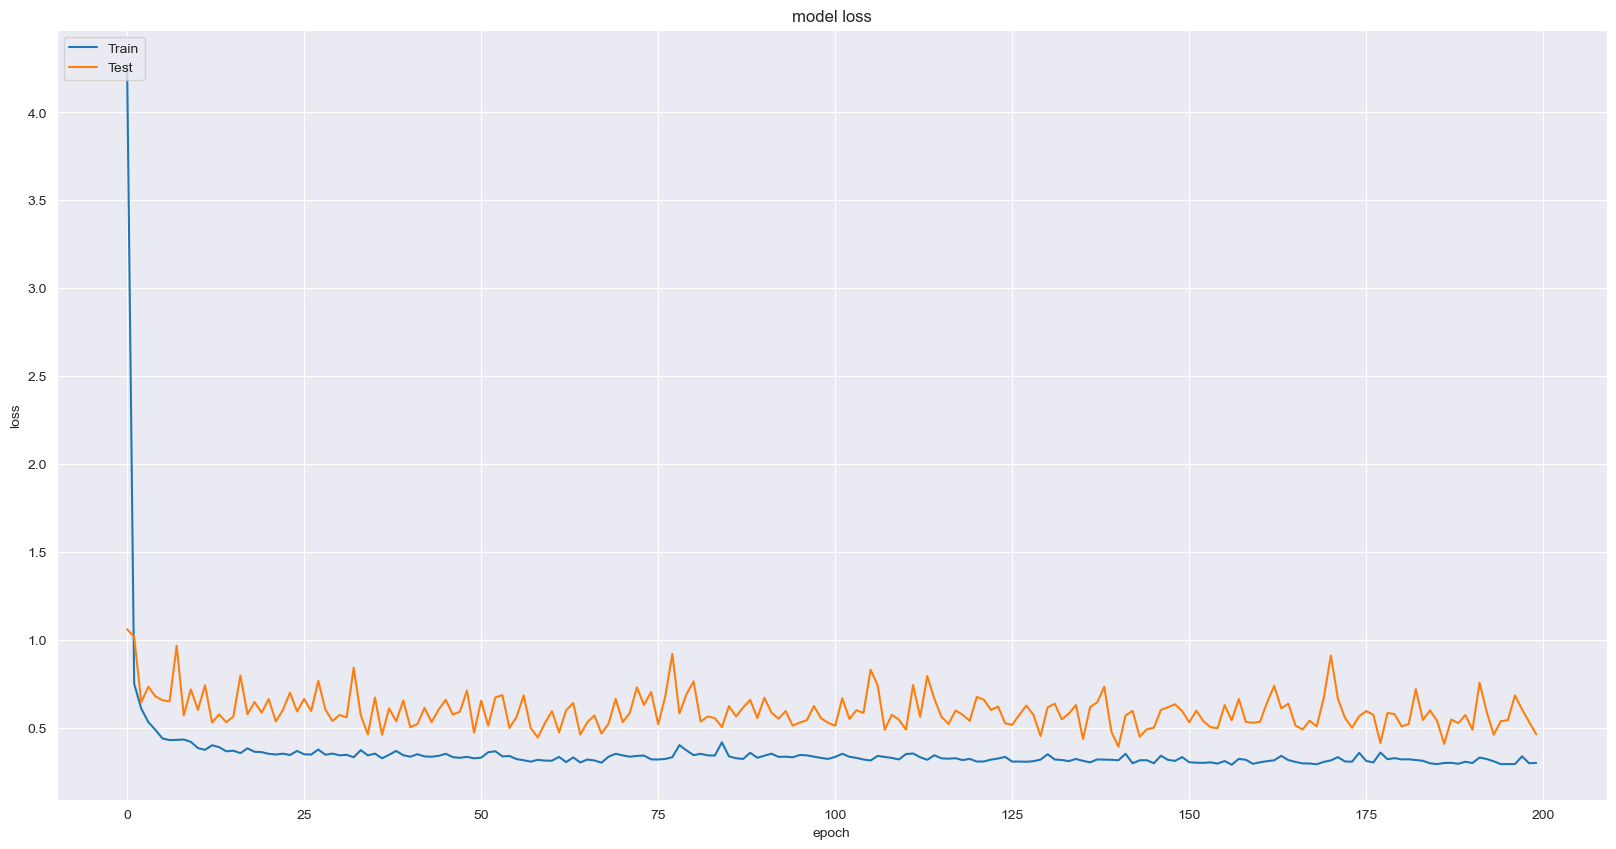

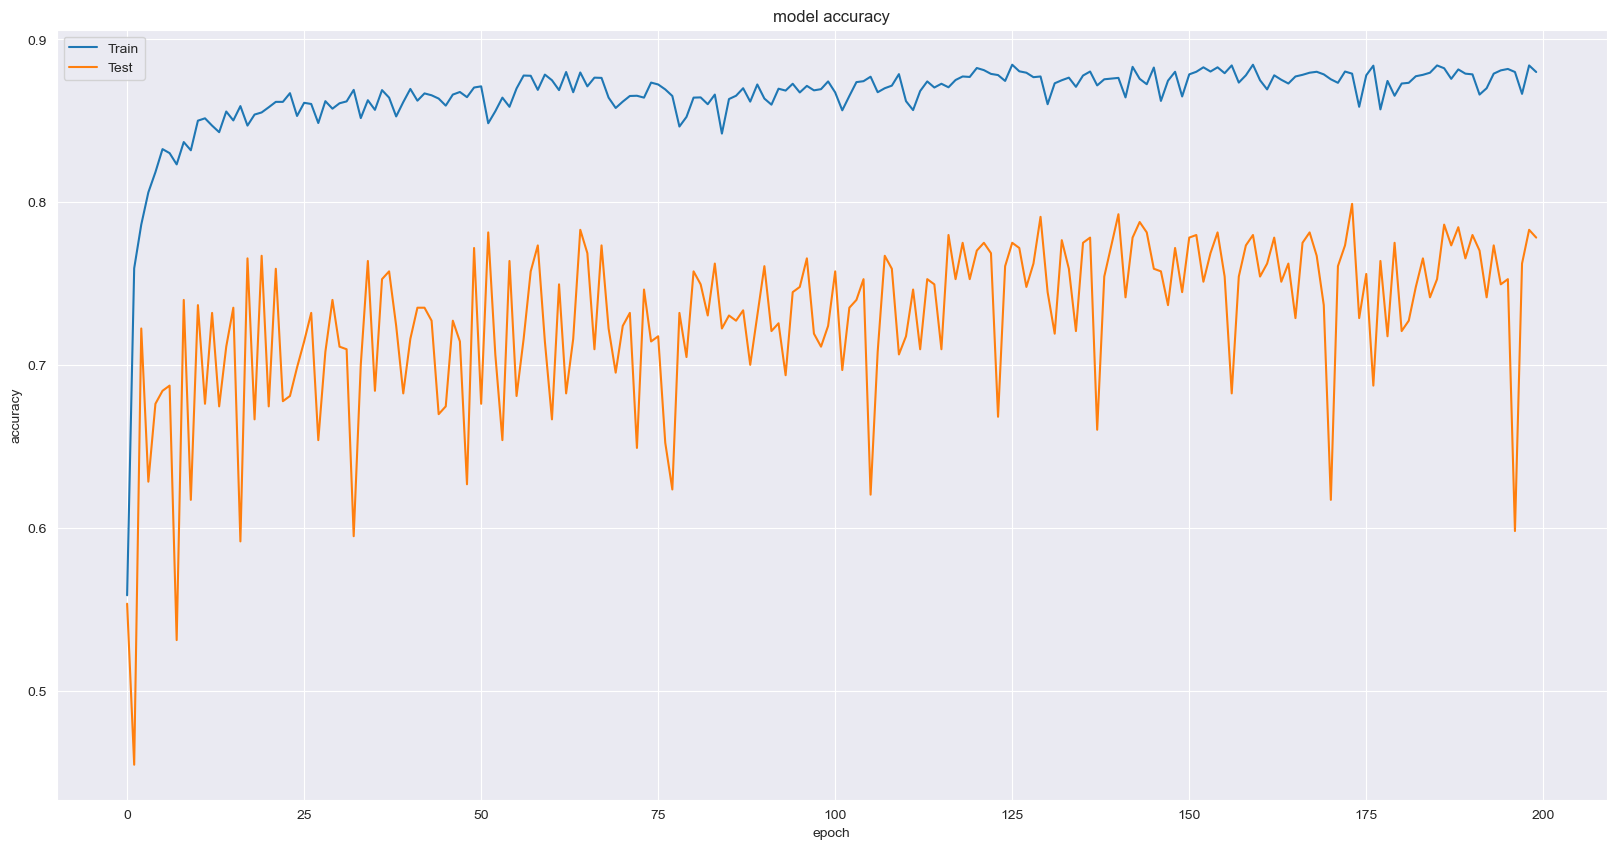

In [50]:
def my_plot(history):
    plt.figure(figsize=(20, 10))
    # plt.style.use("seaborn-paper")
    # summarize history for loss
    plt.plot(np.arange(len(history['training_loss'])),history['training_loss'])
    plt.plot(np.arange(len(history['training_loss'])),history['test_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
     # summarize history for accuracy
    plt.figure(figsize=(20, 10))
    plt.plot(np.arange(len(history['training_loss'])),history['training_acc'])
    plt.plot(np.arange(len(history['training_loss'])),history['test_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

my_plot(history)